In [2]:
import numpy as np
import pandas as pd

In [3]:
from models import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 50)
pd.options.plotting.backend = "plotly" 


# Compare Agg Functions best models vs. Last Fold best models

### Agg Functions best models

In [58]:
best_model_p_func = pd.read_csv('data/best_model_p_func.csv').rename({'Unnamed: 0':"func"},axis=1)
best_model_p_func['model'] = best_model_p_func['model'].str[:-12] 
best_model_p_func = best_model_p_func.replace({'average': 'Average Precision','average_neg_std_25':'Average - Std (aplha=.25)'})

In [31]:
outputs_metrics = pd.read_csv("data/outputs_metrics_refined.csv")
outputs_metrics['model'] = outputs_metrics['model'].str[:-12]
outputs_metrics['model_config'] = outputs_metrics['model'] + outputs_metrics['param_config'].apply(str)

bad_models = outputs_metrics.query('precision_test <0.05')['model_config'].drop_duplicates()
bad_models = list(bad_models)

outputs_metrics = outputs_metrics.query(f'model_config != {bad_models}')



In [32]:

outputs_metrics

,Unnamed: 0,threshold,precision_test,precision_threshold,filename,model,param_config,time,model_config
0,100,0.555556,0.441926,0.366391,"(0, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,0,DecisionTreeClassifier0
1,450,0.485549,0.447646,0.472284,"(1, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,1,DecisionTreeClassifier0
2,800,0.424198,0.397163,0.497674,"(2, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,2,DecisionTreeClassifier0
3,1150,0.516340,0.439252,0.411141,"(3, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,3,DecisionTreeClassifier0
4,1500,0.666667,0.424479,0.464646,"(4, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,4,DecisionTreeClassifier0
...,...,...,...,...,...,...,...,...,...
3495,1949,0.635021,0.680672,0.659864,"(5, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,5,lgb_LGBMClassifier9
3496,2299,0.638066,0.728997,0.679104,"(6, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,6,lgb_LGBMClassifier9
3497,2649,0.648194,0.597260,0.774390,"(7, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,7,lgb_LGBMClassifier9
3498,2999,0.657300,0.534274,0.683794,"(8, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,8,lgb_LGBMClassifier9


In [33]:
# outputs_metrics.query(f"model =='{best_model_last[0]}' & param_config == {best_model_last[1]}")

### Ranks on the Production set

In [34]:
file = 'data/donors_choose_prepared.csv'
data = pd.read_csv(file)
data['as_of_date'] = pd.to_datetime(data.as_of_date)
start_test_production = data.as_of_date.max() - pd.DateOffset(months=2)
start_thresh_prod = data.as_of_date.max() - pd.DateOffset(months=3)
start_train_prod = data.as_of_date.max() - pd.DateOffset(months=6)
data

,entity_id,as_of_date,project_features_entity_id_all_grade_level_Grades 3-5_sum,project_features_entity_id_all_grade_level_Grades 6-8_sum,project_features_entity_id_all_grade_level_Grades 9-12_sum,project_features_entity_id_all_grade_level_Grades PreK-2_sum,project_features_entity_id_all_grade_level__NULL_sum,project_features_entity_id_all_poverty_level__NULL_sum,project_features_entity_id_all_poverty_level_high pov_sum,project_features_entity_id_all_poverty_level_highest _sum,...,donation_features_entity_id_all_teacher_funding_rate_2yr_imp,donation_features_entity_id_all_zip_avg_donations_1yr_sum,donation_features_entity_id_all_zip_avg_donations_1yr_imp,donation_features_entity_id_all_zip_avg_donations_2yr_sum,donation_features_entity_id_all_zip_avg_donations_2yr_imp,donation_features_entity_id_all_zip_funding_rate_1yr_sum,donation_features_entity_id_all_zip_funding_rate_1yr_imp,donation_features_entity_id_all_zip_funding_rate_2yr_sum,donation_features_entity_id_all_zip_funding_rate_2yr_imp,quickstart_label
0,333897,2011-09-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0000,1.0,0.00000,1.0,0.000000,1.0,0.000000,1.0,1.0
1,333592,2011-09-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0000,1.0,0.00000,1.0,0.000000,1.0,0.000000,1.0,0.0
2,333593,2011-09-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0000,1.0,0.00000,1.0,0.000000,1.0,0.000000,1.0,0.0
3,333594,2011-09-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0000,1.0,0.00000,1.0,0.000000,1.0,0.000000,1.0,1.0
4,333595,2011-09-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0000,1.0,0.00000,1.0,0.000000,1.0,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165875,168451,2013-01-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,651.6060,0.0,642.58154,0.0,1.000000,0.0,1.000000,0.0,0.0
165876,168452,2013-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,517.6779,0.0,557.33350,0.0,0.584906,0.0,0.704918,0.0,1.0
165877,168453,2013-01-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0000,1.0,0.00000,1.0,0.000000,1.0,0.000000,1.0,1.0
165878,168430,2013-01-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,260.5326,0.0,304.09012,0.0,0.583333,0.0,0.679245,0.0,0.0


In [35]:
data.as_of_date.max() - pd.DateOffset(months=3)

Timestamp('2012-10-31 00:00:00')

In [36]:
data.as_of_date.max()

Timestamp('2013-01-31 00:00:00')

In [14]:
 #data.query(f'as_of_date > "{start_train_prod}" & as_of_date <= "{start_thresh_prod}" ').drop(['entity_id','as_of_date','quickstart_label'],axis=1)

In [20]:
#pd.read_csv('data/time_windows_frames.csv')

# Jump if not to run again

In [17]:
import re

X_train_prod = data.query(f'as_of_date > "{start_train_prod}" & as_of_date <= "{start_thresh_prod}" ')\
            .drop(['entity_id','as_of_date','quickstart_label'],axis=1)\
            .applymap(float)\
            .rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train_prod = data.query(f'as_of_date > "{start_train_prod}" & as_of_date <= "{start_thresh_prod}" ')\
        ['quickstart_label'].apply(int)

X_test_prod = data.query(f'as_of_date > "{start_thresh_prod}" & as_of_date <= "{start_test_production}" ')\
    .drop(['entity_id','as_of_date','quickstart_label'],axis=1).applymap(float)\
        .rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_test_prod = data.query(f'as_of_date > "{start_thresh_prod}" & as_of_date <= "{start_test_production}" ')\
        ['quickstart_label'].apply(int)

X_val_prod = data.query(f'as_of_date > "{start_test_production}"  ')\
        .drop(['entity_id','as_of_date','quickstart_label'],axis=1).applymap(float)\
        .rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_val_prod = data.query(f'as_of_date > "{start_test_production}" ')\
        ['quickstart_label'].apply(int)

In [18]:
len(X_train_prod)/165880

0.23997468049192186

In [19]:
outputs_metrics = pd.read_csv("data/outputs_metrics_refined.csv")
outputs_metrics

,Unnamed: 0,threshold,precision_test,precision_threshold,filename,model,param_config,time
0,100,0.555556,0.441926,0.366391,"(0, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier_date_params,0,0
1,450,0.485549,0.447646,0.472284,"(1, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier_date_params,0,1
2,800,0.424198,0.397163,0.497674,"(2, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier_date_params,0,2
3,1150,0.516340,0.439252,0.411141,"(3, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier_date_params,0,3
4,1500,0.666667,0.424479,0.464646,"(4, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier_date_params,0,4
...,...,...,...,...,...,...,...,...
3495,1949,0.635021,0.680672,0.659864,"(5, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier_date_params,9,5
3496,2299,0.638066,0.728997,0.679104,"(6, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier_date_params,9,6
3497,2649,0.648194,0.597260,0.774390,"(7, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier_date_params,9,7
3498,2999,0.657300,0.534274,0.683794,"(8, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier_date_params,9,8


In [20]:
all_model_configs = pd.read_csv("data/outputs_metrics_refined.csv")[['filename','model','param_config']].groupby(['model','param_config']).first().reset_index()
all_model_configs.sort_values('filename')

,model,param_config,filename
150,RandomForestClassifier_date_params,0,"(0, 0, 0)_RandomForestClassifier_date_params.csv"
151,RandomForestClassifier_date_params,1,"(0, 0, 1)_RandomForestClassifier_date_params.csv"
160,RandomForestClassifier_date_params,10,"(0, 0, 10)_RandomForestClassifier_date_params.csv"
161,RandomForestClassifier_date_params,11,"(0, 0, 11)_RandomForestClassifier_date_params.csv"
162,RandomForestClassifier_date_params,12,"(0, 0, 12)_RandomForestClassifier_date_params.csv"
163,RandomForestClassifier_date_params,13,"(0, 0, 13)_RandomForestClassifier_date_params.csv"
164,RandomForestClassifier_date_params,14,"(0, 0, 14)_RandomForestClassifier_date_params.csv"
165,RandomForestClassifier_date_params,15,"(0, 0, 15)_RandomForestClassifier_date_params.csv"
166,RandomForestClassifier_date_params,16,"(0, 0, 16)_RandomForestClassifier_date_params.csv"
167,RandomForestClassifier_date_params,17,"(0, 0, 17)_RandomForestClassifier_date_params.csv"


In [21]:
find_threshold = find_threshold_2

In [22]:
#results = []
important_models = all_model_configs.loc[(all_model_configs['model']+all_model_configs['param_config'].apply(str)).isin(best_model_p_func['model']+best_model_p_func['param_config'].apply(str)).to_frame('is_important').query('is_important == True').index]

for _,(model,param_config,filename) in all_model_configs.iterrows():
    print((model,param_config,filename))
    model = model[:-12]
    if not (model+str(param_config)  in np.array(results, dtype=np.object)[:,0]+np.array(results, dtype=np.str)[:,1].astype(np.object)):
        
        print((model,param_config,filename))
        model_params = pd.read_csv('outputs_models3/'+filename,index_col = 'Unnamed: 0')['0'].get_p

        model_params = model_params.replace("nan", "None")
        best_model_config = clfs_names_dict[model](**eval(model_params))

        best_model_config.fit(X_train_prod,y_train_prod)
        y_proba_val_prod = best_model_config.predict_proba(X_val_prod)[:,1]
        threshold_prod,precision_val_prod = find_threshold(y_val_prod,y_proba_val_prod)
        y_proba_test_prod = best_model_config.predict_proba(X_test_prod)[:,1]
        precision_prod = precision_score(y_test_prod,y_proba_test_prod>threshold_prod)
        results.append([model,param_config,filename,precision_prod,model_params])
        display(pd.DataFrame(results).iloc[-1])

('DecisionTreeClassifier_date_params', 0, '(0, 2, 0)_DecisionTreeClassifier_date_params.csv')


NameError: name 'results' is not defined

In [ ]:
all_model_configs.sample(5)

In [27]:
#results.to_csv('production_results.csv')


In [21]:
results_

NameError: name 'results_' is not defined

In [28]:

results = pd.DataFrame(results,columns = ['model','param_config','filename','precision_prod','params'])
results['rank_prod']= results.precision_prod.rank(ascending = False)
results

,model,param_config,filename,precision_prod,params,rank_prod
0,DecisionTreeClassifier,0,"(0, 2, 0)_DecisionTreeClassifier_date_params.csv",0.435897,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",244.0
1,DecisionTreeClassifier,1,"(0, 2, 1)_DecisionTreeClassifier_date_params.csv",0.000000,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",316.0
2,DecisionTreeClassifier,2,"(0, 2, 2)_DecisionTreeClassifier_date_params.csv",0.386228,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",255.0
3,DecisionTreeClassifier,3,"(0, 2, 3)_DecisionTreeClassifier_date_params.csv",0.000000,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",316.0
4,DecisionTreeClassifier,4,"(0, 2, 4)_DecisionTreeClassifier_date_params.csv",0.429066,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",247.0
5,DecisionTreeClassifier,5,"(0, 2, 5)_DecisionTreeClassifier_date_params.csv",0.408377,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",252.0
6,DecisionTreeClassifier,6,"(0, 2, 6)_DecisionTreeClassifier_date_params.csv",0.471154,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",218.0
7,DecisionTreeClassifier,7,"(0, 2, 7)_DecisionTreeClassifier_date_params.csv",0.000000,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",316.0
8,DecisionTreeClassifier,8,"(0, 2, 8)_DecisionTreeClassifier_date_params.csv",0.463320,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",223.0
9,DecisionTreeClassifier,9,"(0, 2, 9)_DecisionTreeClassifier_date_params.csv",0.000000,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",316.0


# After calculating prod results

In [37]:
results = pd.read_csv('production_results.csv')

In [38]:

results_important = pd.DataFrame(results,columns = ['model','param_config','filename','precision_prod'])
results_important['rank_prod']= results_important.precision_prod.rank(ascending = False)
results_important

,model,param_config,filename,precision_prod,rank_prod
0,DecisionTreeClassifier,0,"(0, 2, 0)_DecisionTreeClassifier_date_params.csv",0.435897,244.0
1,DecisionTreeClassifier,1,"(0, 2, 1)_DecisionTreeClassifier_date_params.csv",0.000000,316.0
2,DecisionTreeClassifier,2,"(0, 2, 2)_DecisionTreeClassifier_date_params.csv",0.386228,255.0
3,DecisionTreeClassifier,3,"(0, 2, 3)_DecisionTreeClassifier_date_params.csv",0.000000,316.0
4,DecisionTreeClassifier,4,"(0, 2, 4)_DecisionTreeClassifier_date_params.csv",0.429066,247.0
5,DecisionTreeClassifier,5,"(0, 2, 5)_DecisionTreeClassifier_date_params.csv",0.408377,252.0
6,DecisionTreeClassifier,6,"(0, 2, 6)_DecisionTreeClassifier_date_params.csv",0.471154,218.0
7,DecisionTreeClassifier,7,"(0, 2, 7)_DecisionTreeClassifier_date_params.csv",0.000000,316.0
8,DecisionTreeClassifier,8,"(0, 2, 8)_DecisionTreeClassifier_date_params.csv",0.463320,223.0
9,DecisionTreeClassifier,9,"(0, 2, 9)_DecisionTreeClassifier_date_params.csv",0.000000,316.0


In [39]:
best_model_last_info = outputs_metrics.query("time == 9").sort_values('precision_test',ascending=False).iloc[0]
best_model_last = list(best_model_last_info[['model','param_config']].values)
best_model_last_precision = best_model_last_info.precision_test
#best_model_last[0] = best_model_last[0][:-12]
best_model_last

['lgb_LGBMClassifier', 9]

In [40]:
#best_model_p_func = best_model_p_func.iloc[:-2]
best_model_p_func = best_model_p_func.append(\
                            pd.DataFrame([['best_model_last_fold'] + best_model_last]\
                                         ,columns =best_model_p_func.columns ),ignore_index = True)
#best_model_p_func = best_model_p_func.iloc[:-2]
best_model_p_func

,func,model,param_config
0,Average Precision,XGBClassifier,32
1,Average + Standard Dev. ($lpha$),XGBClassifier,32
2,average_neg_std_50,XGBClassifier,32
3,average_neg_std_75,XGBClassifier,32
4,neg_stdev,DecisionTreeClassifier,1
5,weighted_avg,XGBClassifier,35
6,regret_average,XGBClassifier,32
7,regret_neg_std,lgb_LGBMClassifier,31
8,mean_neg_std_regret_25,XGBClassifier,49
9,mean_neg_std_regret_50,lgb_LGBMClassifier,2


In [41]:
results = pd.read_csv('production_results.csv')
results['model_config'] = results['model'] + results['param_config'].apply(str)

results = results.query(f'model_config != {bad_models}')
results['rank_prod'] = results['rank_prod'].rank()
results['regret_prod'] = results['precision_prod'] - results['precision_prod'].max()
results.sort_values('rank_prod')

,Unnamed: 0,model,param_config,filename,precision_prod,params,rank_prod,model_config,regret_prod
272,272,XGBClassifier,22,"(0, 4, 22)_XGBClassifier_date_params.csv",0.720207,"{'objective': 'binary:logistic', 'base_score':...",1.0,XGBClassifier22,0.000000
293,293,XGBClassifier,43,"(0, 4, 43)_XGBClassifier_date_params.csv",0.694444,"{'objective': 'binary:logistic', 'base_score':...",2.0,XGBClassifier43,-0.025763
181,181,RandomForestClassifier,31,"(0, 0, 31)_RandomForestClassifier_date_params.csv",0.686869,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",3.0,RandomForestClassifier31,-0.033339
166,166,RandomForestClassifier,16,"(0, 0, 16)_RandomForestClassifier_date_params.csv",0.685990,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",4.0,RandomForestClassifier16,-0.034217
268,268,XGBClassifier,18,"(0, 4, 18)_XGBClassifier_date_params.csv",0.676692,"{'objective': 'binary:logistic', 'base_score':...",5.0,XGBClassifier18,-0.043516
295,295,XGBClassifier,45,"(0, 4, 45)_XGBClassifier_date_params.csv",0.674157,"{'objective': 'binary:logistic', 'base_score':...",6.0,XGBClassifier45,-0.046050
154,154,RandomForestClassifier,4,"(0, 0, 4)_RandomForestClassifier_date_params.csv",0.673575,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",7.0,RandomForestClassifier4,-0.046632
346,346,lgb_LGBMClassifier,46,"(0, 3, 46)_lgb_LGBMClassifier_date_params.csv",0.672956,"{'boosting_type': 'dart', 'class_weight': None...",8.0,lgb_LGBMClassifier46,-0.047251
302,302,lgb_LGBMClassifier,2,"(0, 3, 2)_lgb_LGBMClassifier_date_params.csv",0.670807,"{'boosting_type': 'dart', 'class_weight': None...",9.0,lgb_LGBMClassifier2,-0.049400
186,186,RandomForestClassifier,36,"(0, 0, 36)_RandomForestClassifier_date_params.csv",0.669903,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",10.0,RandomForestClassifier36,-0.050304


In [42]:

last_fold_results = outputs_metrics.query("time == 9").sort_values('precision_test',ascending=False)
last_fold_results['rank_last_fold']=last_fold_results.precision_test.rank(ascending=False)
#last_fold_results['model'] = last_fold_results['model'].str[:-12]
#pd.merge(last_fold_results.rename({'outputs_metrics':'last_fold_precision'},axis=1),final_results,on=['model','param_config'])
#last_fold_results['model'] = last_fold_results['model'].str[:-12] 
last_fold_results

,Unnamed: 0,threshold,precision_test,precision_threshold,filename,model,param_config,time,model_config,rank_last_fold
3499,3349,0.686919,0.627599,0.435789,"(9, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,9,lgb_LGBMClassifier9,1.0
3229,3322,0.677751,0.624113,0.423313,"(9, 3, 29)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,29,9,lgb_LGBMClassifier29,2.0
3269,3326,0.694461,0.617284,0.416499,"(9, 3, 32)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,32,9,lgb_LGBMClassifier32,3.0
1599,3159,0.570983,0.615530,0.575000,"(9, 0, 17)_RandomForestClassifier_date_params.csv",RandomForestClassifier,17,9,RandomForestClassifier17,4.0
3029,3302,0.661851,0.614916,0.423313,"(9, 3, 10)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,10,9,lgb_LGBMClassifier10,5.0
3049,3304,0.673211,0.613309,0.479167,"(9, 3, 12)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,12,9,lgb_LGBMClassifier12,6.0
3369,3336,0.682864,0.612774,0.405088,"(9, 3, 41)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,41,9,lgb_LGBMClassifier41,7.0
1879,3187,0.637526,0.612524,0.591429,"(9, 0, 42)_RandomForestClassifier_date_params.csv",RandomForestClassifier,42,9,RandomForestClassifier42,8.0
2609,3360,0.768360,0.612371,0.398844,"(9, 4, 18)_XGBClassifier_date_params.csv",XGBClassifier,18,9,XGBClassifier18,9.0
1769,3176,0.613276,0.612083,0.571823,"(9, 0, 32)_RandomForestClassifier_date_params.csv",RandomForestClassifier,32,9,RandomForestClassifier32,10.0


In [43]:
final_results = best_model_p_func.merge(results,on=['model','param_config']).sort_values('rank_prod')[['func','model','param_config','precision_prod','regret_prod']]#.params.values
final_results

,func,model,param_config,precision_prod,regret_prod
9,mean_neg_std_regret_50,lgb_LGBMClassifier,2,0.670807,-0.049400
0,Average Precision,XGBClassifier,32,0.658824,-0.061384
1,Average + Standard Dev. ($lpha$),XGBClassifier,32,0.658824,-0.061384
2,average_neg_std_50,XGBClassifier,32,0.658824,-0.061384
3,average_neg_std_75,XGBClassifier,32,0.658824,-0.061384
4,regret_average,XGBClassifier,32,0.658824,-0.061384
5,mean_neg_std_regret_75,XGBClassifier,32,0.658824,-0.061384
10,rank_average,lgb_LGBMClassifier,30,0.637931,-0.082276
11,mean_neg_std_rank_25,lgb_LGBMClassifier,30,0.637931,-0.082276
12,mean_neg_std_rank_50,lgb_LGBMClassifier,30,0.637931,-0.082276


In [44]:
#outputs_metrics.query("time == 9").sort_values('precision_test',ascending=False)

In [45]:
last_fold_results['regret_last_fold'] = last_fold_results.precision_test - last_fold_results.precision_test.max()

In [46]:
last_fold_results_ = last_fold_results.set_index(['model','param_config'])[['precision_test', 'rank_last_fold','regret_last_fold']]

In [80]:
ranking_metrics = pd.read_csv('ranking_metrics.csv')
ranking_metrics['model'] = ranking_metrics['model'].str[:-12]
ranking_metrics = ranking_metrics.set_index(['model','param_config'])
ranking_metrics

average  average_neg_std_25  \
model                  param_config                                 
DecisionTreeClassifier 0             0.410483            0.070350   
                       1             0.000000            0.000000   
                       2             0.440542            0.070704   
                       3             0.000000            0.000000   
                       4             0.409048            0.051623   
                       5             0.286952           -0.079909   
                       6             0.445182            0.012366   
                       7             0.000000            0.000000   
                       8             0.477350            0.075258   
                       9             0.073080           -0.097302   
                       10            0.459319            0.040767   
                       11            0.460737            0.073154   
                       12            0.454358           -0.016159   
                       13            0.000000            0.000000   
                       14            0.285133           -0.112935   
                       15            0.000000            0.000000   
                       16            0.468990            0.077968   
                       17            0.055072           -0.116848   
                       18            0.418888            0.061367   
                       19            0.093421           -0.132922   
                       20            0.430241            0.051435   
                       21            0.000000            0.000000   
                       22            0.025664           -0.054451   
                       23            0.407151            0.060621   
                       24            0.455747            0.070152   
                       25            0.457259            0.069895   
                       26            0.415488            0.065915   
                       27            0.317051           -0.088925   
                       28            0.455545            0.065671   
                       29            0.515220            0.070996   
                       30            0.000000            0.000000   
                       31            0.039216           -0.083204   
                       32            0.401716           -0.015236   
                       33            0.461238            0.070636   
                       34            0.459678            0.071120   
                       35            0.465176            0.069488   
                       36            0.045639           -0.096832   
                       37            0.451769            0.080704   
                       38            0.434614            0.072133   
                       39            0.407863            0.061307   
                       40            0.420776            0.056081   
                       41            0.445724            0.060655   
                       42            0.025664           -0.054451   
                       43            0.147159           -0.121812   
                       44            0.464251            0.074934   
                       45            0.413369            0.066466   
                       46            0.000000            0.000000   
                       47            0.468200            0.064741   
                       48            0.000000            0.000000   
                       49            0.000000            0.000000   
LogisticRegression     0             0.514120            0.060089   
                       1             0.513907            0.064913   
                       2             0.514930            0.064714   
                       3             0.514120            0.060089   
                       4             0.513177            0.066401   
                       5             0.514120            0.060089   
                       6            

In [82]:
easy_names_funcs = ranking_metrics.columns


In [90]:
easy_names_funcs

Index(['average', 'average_neg_std_25', 'average_neg_std_50',
       'average_neg_std_75', 'neg_stdev', 'weighted_avg', 'regret_average',
       'regret_neg_std', 'mean_neg_std_regret_25', 'mean_neg_std_regret_50',
       'mean_neg_std_regret_75', 'rank_average', 'rank_neg_std',
       'mean_neg_std_rank_25', 'mean_neg_std_rank_50', 'mean_neg_std_rank_75'],
      dtype='object')

In [84]:
ranking_metrics.columns = ['Precision: Average', 'Precision: Avg + Neg_Std (aplha=.25)', 'Precision: Avg + Neg_Std (aplha=.50)',
       'Precision: Avg + Neg_Std (aplha=.75)', 'Precision: Neg_Std', 'Weighted Avg', 'Regret: Avg',
       'Regret: Neg_Std', 'Regret: Avg + Neg_Std (aplha=.25)', 'Regret: Avg + Neg_Std (aplha=.50) ',
       'Regret: Avg + Neg_Std (aplha=.75)', 'Rank: Avg ', 'Rank: Neg_Std',
       'Rank: Avg + Neg_Std (aplha=.25)', 'Rank: Avg + Neg_Std (aplha=.50) ',
       'Rank: Avg + Neg_Std (aplha=.75)']

In [85]:
ranking_funcs_vs_prod = pd.merge(ranking_metrics.reset_index(),results[['model','param_config','regret_prod']].rename({'regret_prod': 'Regret in Production'},axis=1),on=['model','param_config'])
ranking_funcs_vs_prod

,model,param_config,Precision: Average,Precision: Avg + Neg_Std (aplha=.25),Precision: Avg + Neg_Std (aplha=.50),Precision: Avg + Neg_Std (aplha=.75),Precision: Neg_Std,Weighted Avg,Regret: Avg,Regret: Neg_Std,Regret: Avg + Neg_Std (aplha=.25),Regret: Avg + Neg_Std (aplha=.50),Regret: Avg + Neg_Std (aplha=.75),Rank: Avg,Rank: Neg_Std,Rank: Avg + Neg_Std (aplha=.25),Rank: Avg + Neg_Std (aplha=.50),Rank: Avg + Neg_Std (aplha=.75),Regret in Production
0,DecisionTreeClassifier,0,0.410483,0.070350,0.183728,0.297105,-0.043028,0.394516,-0.490436,-0.168099,-0.248683,-0.329268,-0.409852,106.50,-23.861871,8.728597,41.319064,73.909532,-0.284310
1,DecisionTreeClassifier,2,0.440542,0.070704,0.193983,0.317263,-0.052575,0.420317,-0.460378,-0.156634,-0.232570,-0.308506,-0.384442,119.50,-25.691546,10.606340,46.904227,83.202113,-0.333980
2,DecisionTreeClassifier,4,0.409048,0.051623,0.170765,0.289906,-0.067518,0.384375,-0.491872,-0.185369,-0.261995,-0.338620,-0.415246,108.35,-33.778733,1.753451,37.285634,72.817817,-0.291142
3,DecisionTreeClassifier,6,0.445182,0.012366,0.156638,0.300910,-0.131906,0.391543,-0.455738,-0.206161,-0.268555,-0.330950,-0.393344,158.90,-104.407801,-38.580851,27.246100,93.073050,-0.249053
4,DecisionTreeClassifier,8,0.477350,0.075258,0.209288,0.343319,-0.058773,0.459168,-0.423570,-0.137916,-0.209330,-0.280743,-0.352156,136.40,-33.103206,9.272596,51.648397,94.024199,-0.256887
5,DecisionTreeClassifier,10,0.459319,0.040767,0.180285,0.319802,-0.098750,0.425378,-0.441600,-0.147604,-0.221103,-0.294602,-0.368101,122.10,-35.769167,3.698124,43.165416,82.632708,-0.244017
6,DecisionTreeClassifier,11,0.460737,0.073154,0.202349,0.331543,-0.056040,0.428519,-0.440182,-0.167170,-0.235423,-0.303676,-0.371929,133.60,-47.679952,-2.359964,42.960024,88.280012,-0.263311
7,DecisionTreeClassifier,16,0.468990,0.077968,0.208309,0.338649,-0.052372,0.445899,-0.431930,-0.154749,-0.224044,-0.293339,-0.362635,134.40,-30.030355,11.077234,52.184822,93.292411,-0.289390
8,DecisionTreeClassifier,18,0.418888,0.061367,0.180541,0.299715,-0.057806,0.399245,-0.482031,-0.160313,-0.240743,-0.321172,-0.401602,108.00,-29.597297,4.802027,39.201351,73.600676,-0.318367
9,DecisionTreeClassifier,20,0.430241,0.051435,0.177704,0.303972,-0.074833,0.395264,-0.470679,-0.201660,-0.268915,-0.336169,-0.403424,132.85,-78.759144,-25.856858,27.045428,79.947714,-0.271931


average


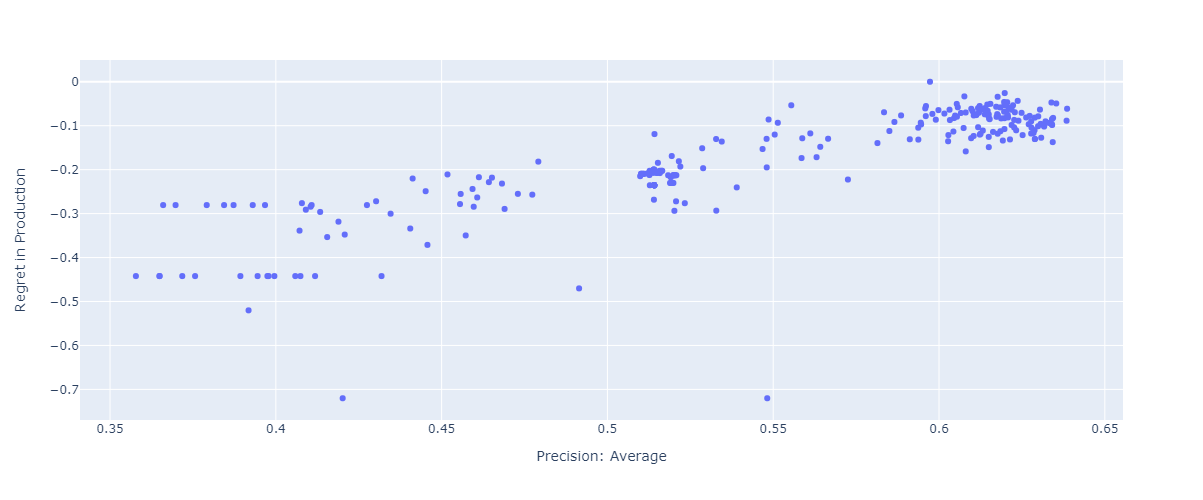

average_neg_std_25


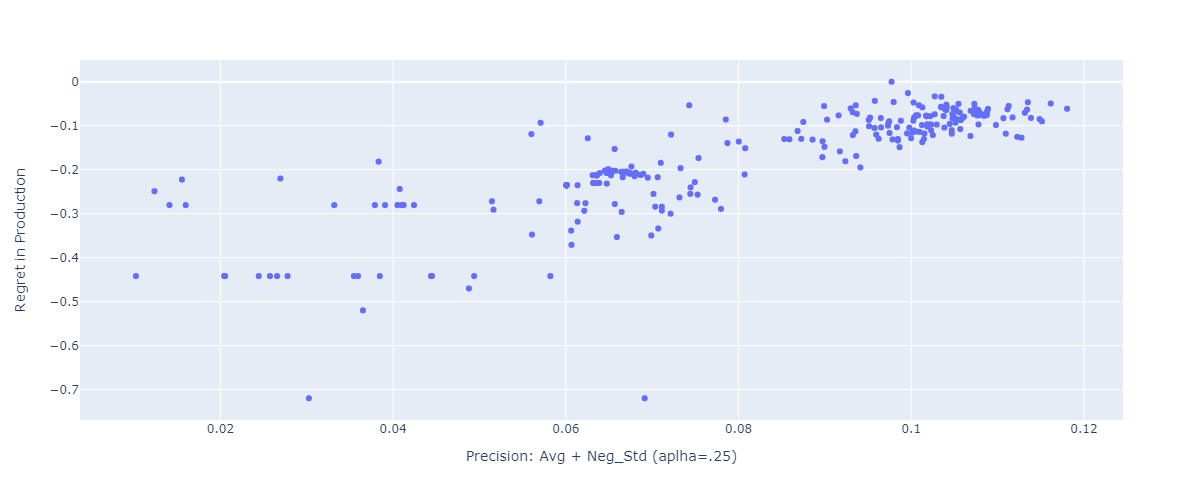

average_neg_std_50


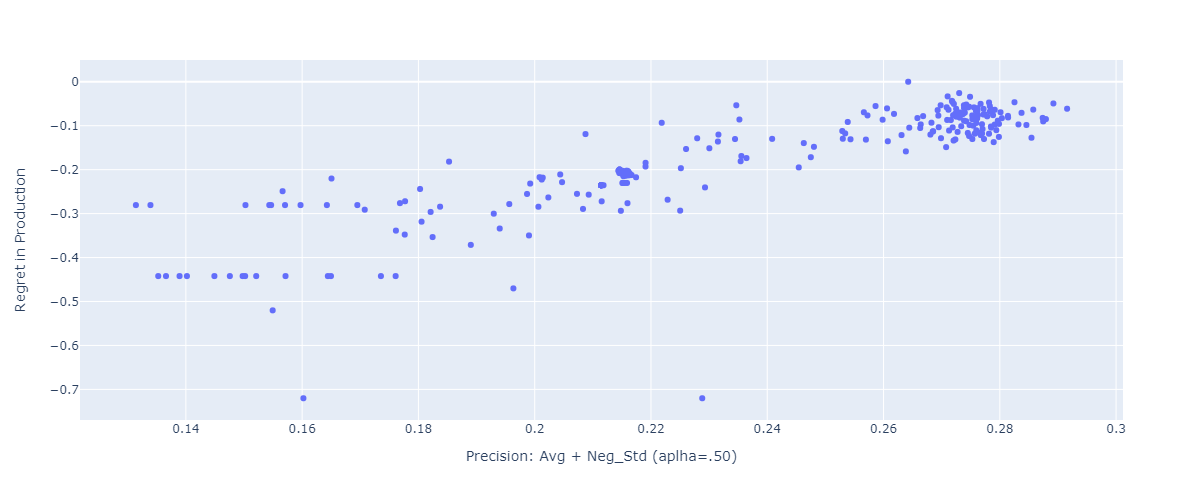

average_neg_std_75


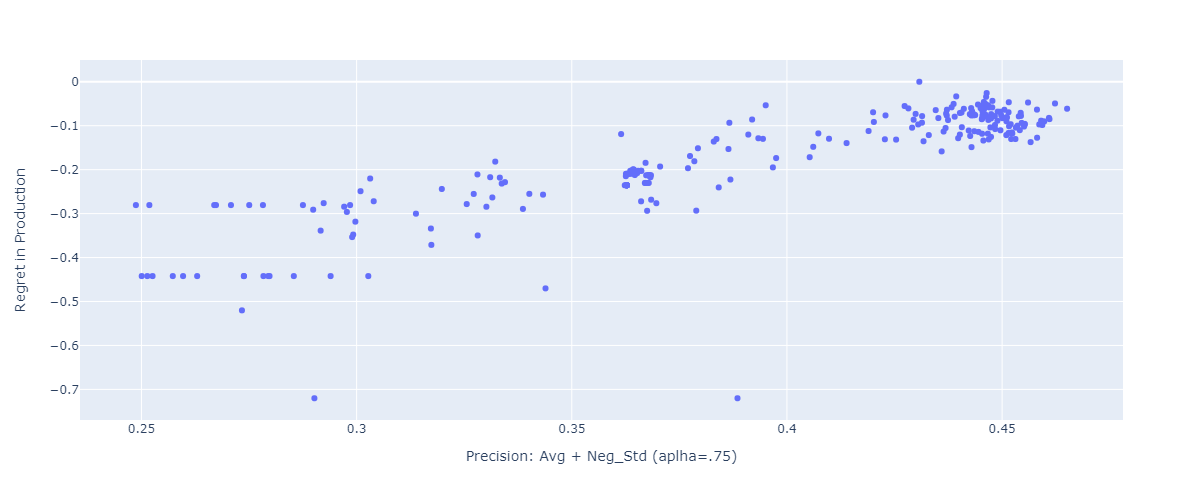

neg_stdev


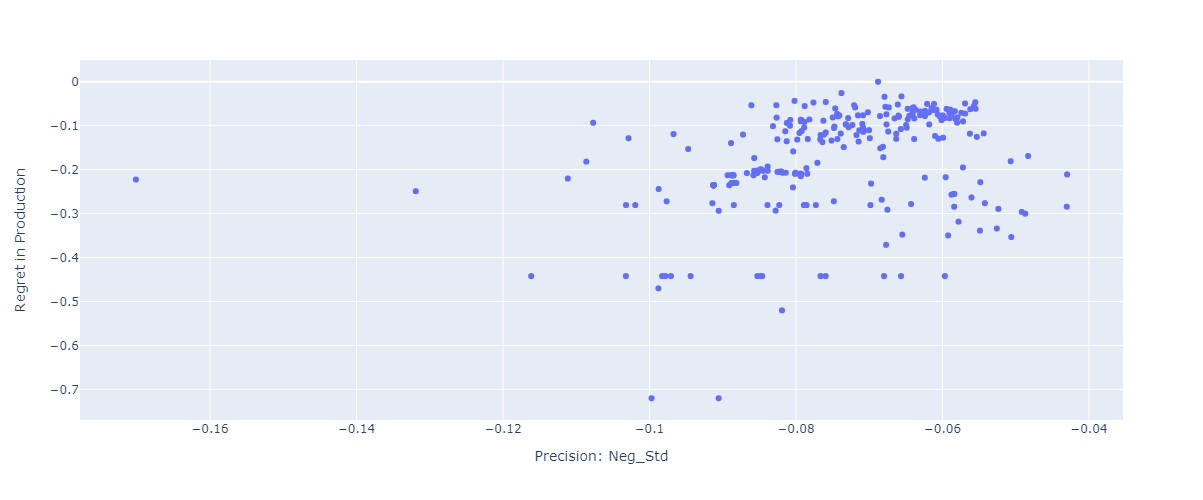

weighted_avg


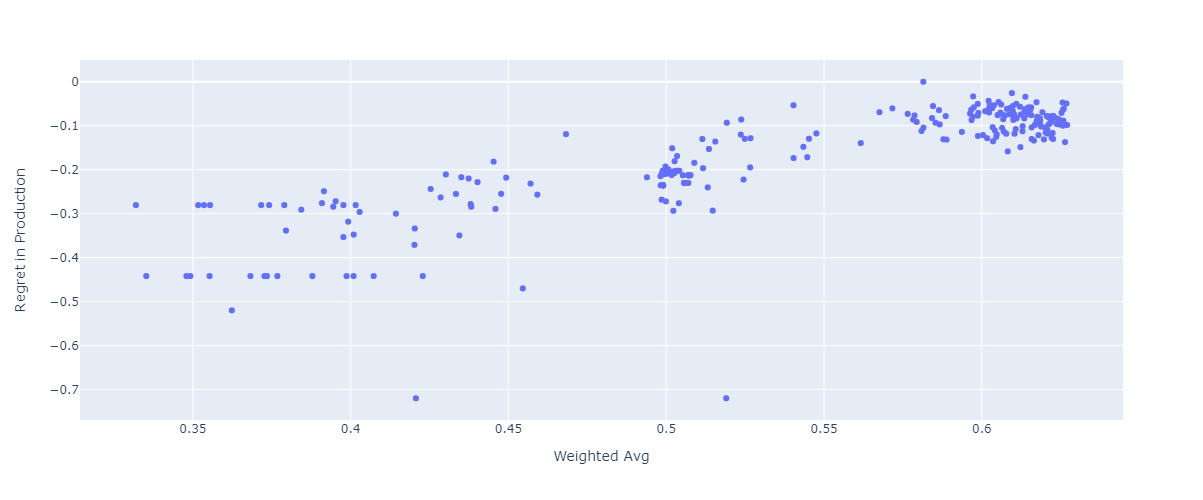

regret_average


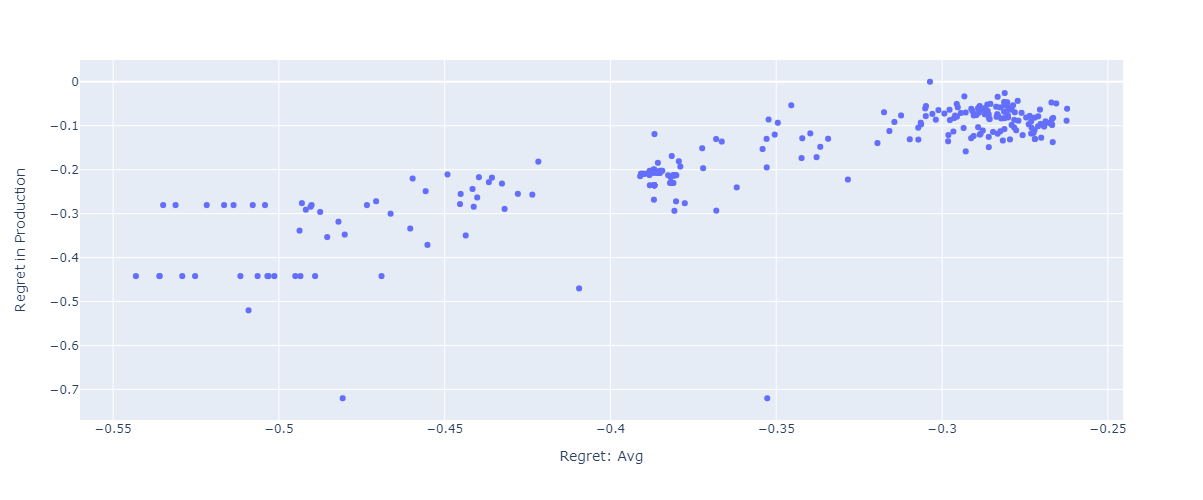

regret_neg_std


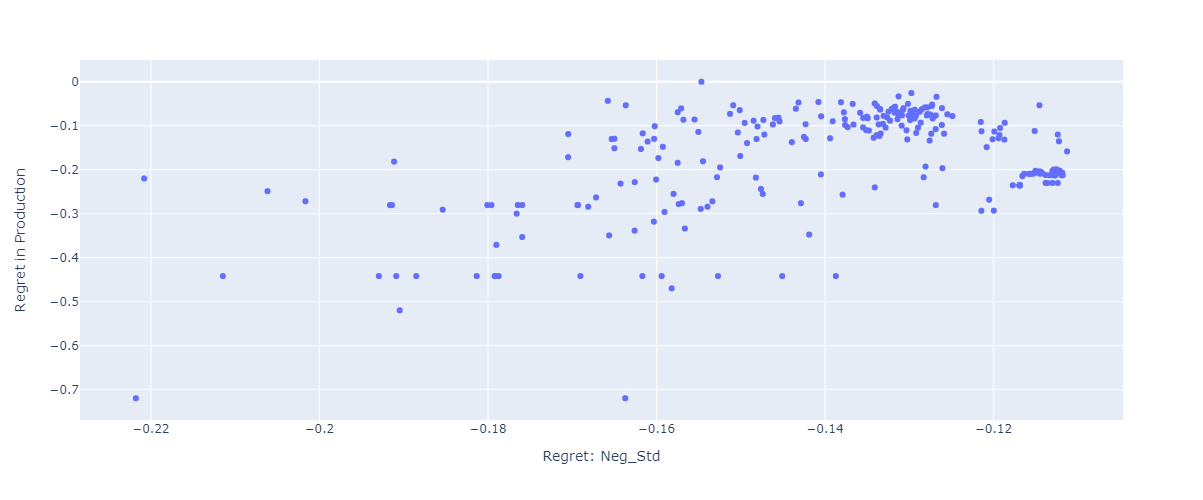

mean_neg_std_regret_25


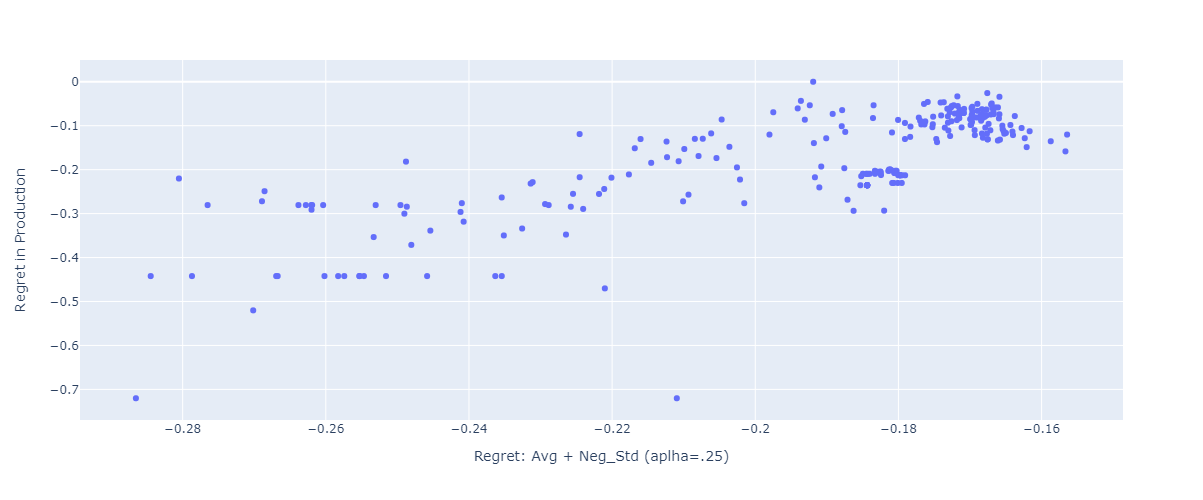

mean_neg_std_regret_50


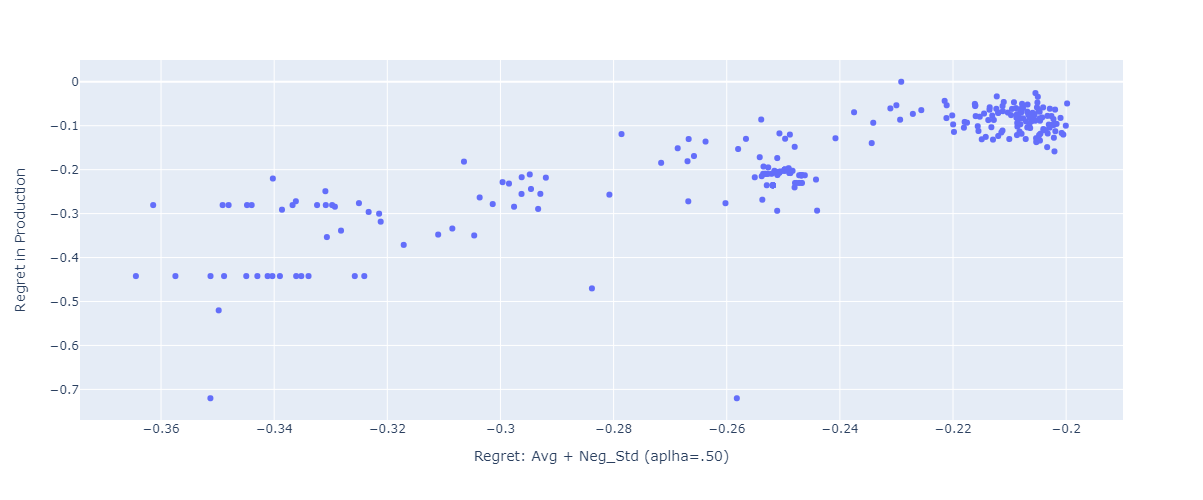

mean_neg_std_regret_75


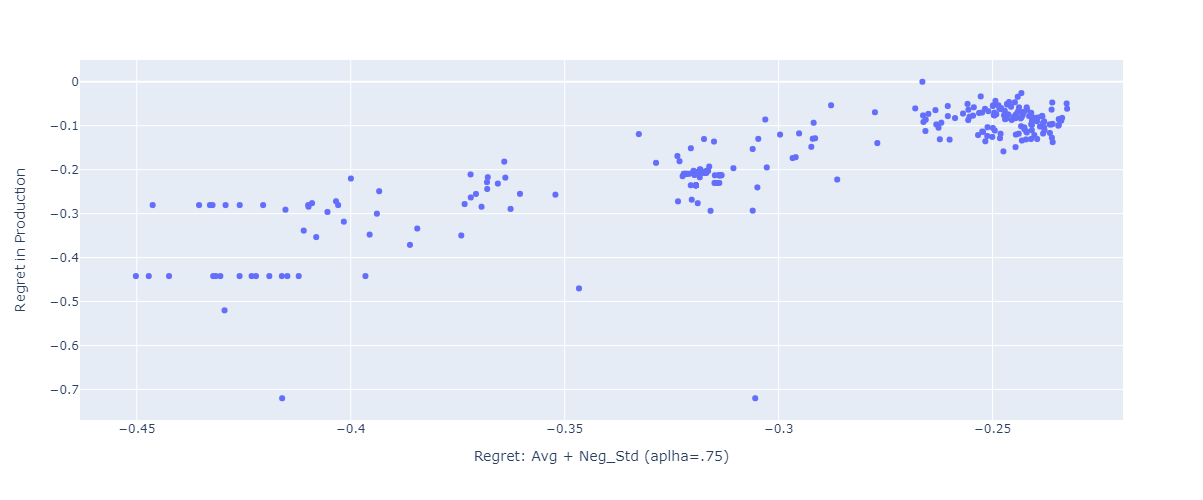

rank_average


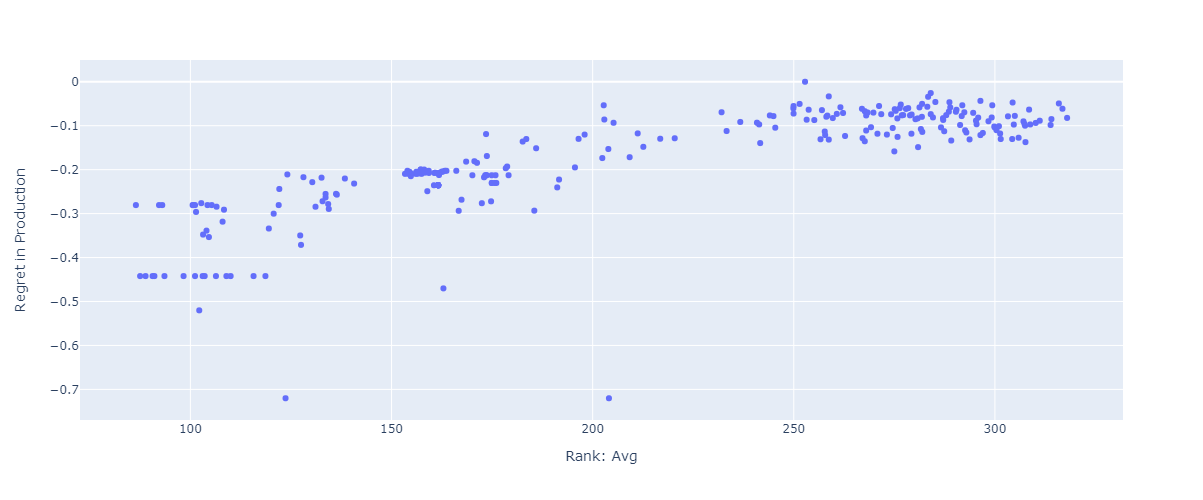

rank_neg_std


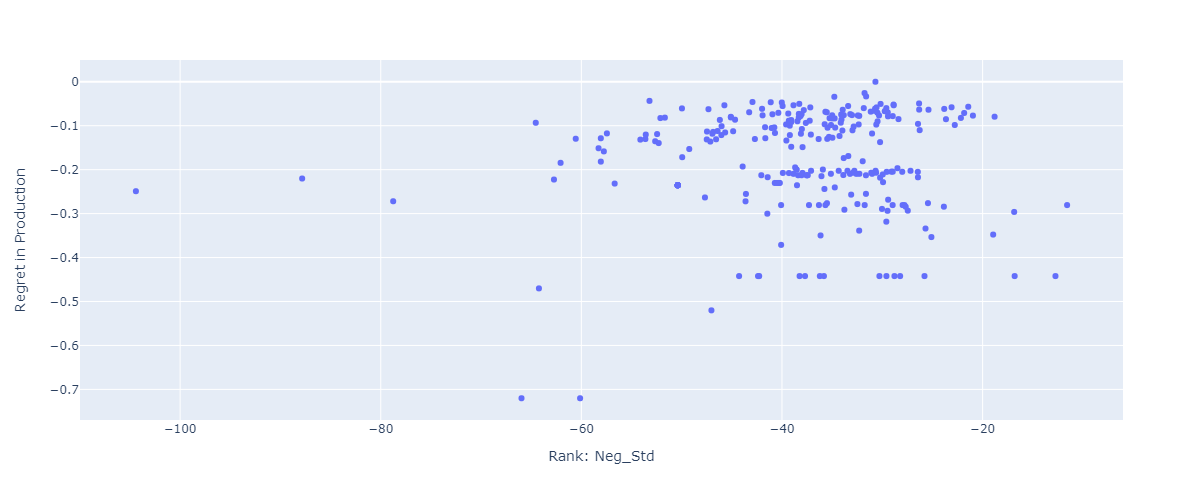

mean_neg_std_rank_25


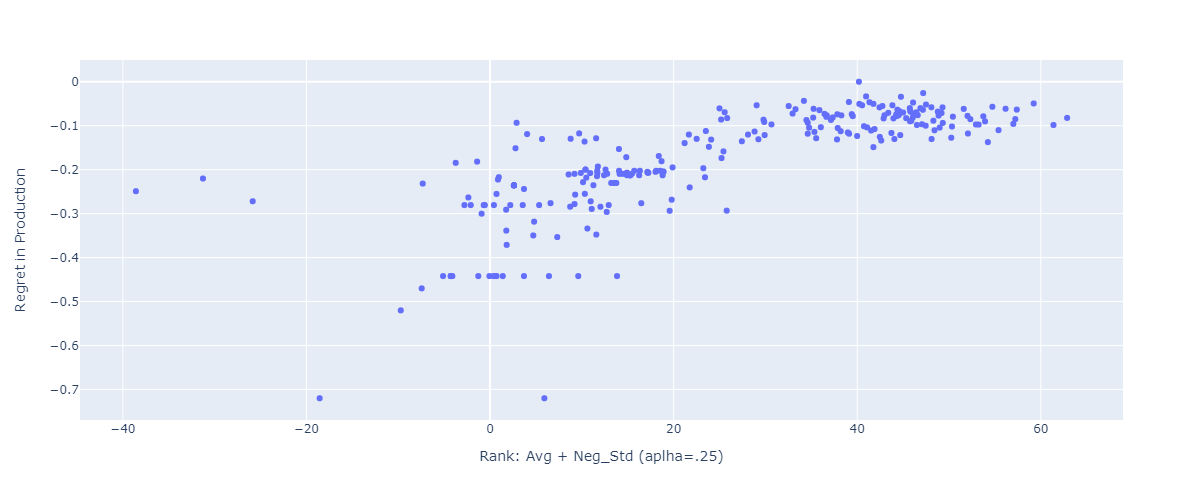

mean_neg_std_rank_50


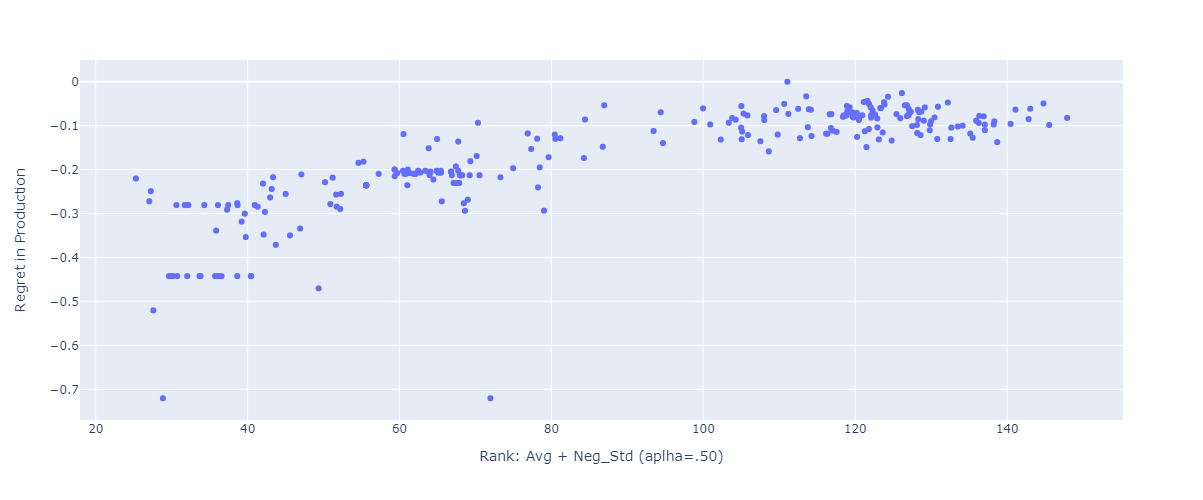

mean_neg_std_rank_75


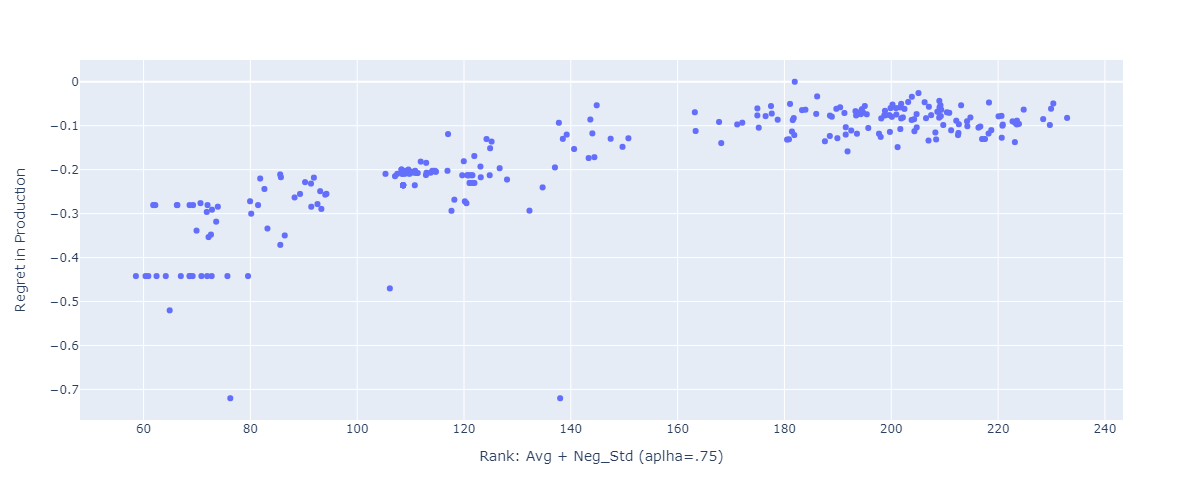

In [88]:
import plotly.express as px
for i,c in enumerate(ranking_funcs_vs_prod.columns[2:-1]):
    print(easy_names_funcs[i])
    fig = ranking_funcs_vs_prod.plot(kind ='scatter',x=c,y='Regret in Production',width=500,height=500)
    fig.write_image(f"images/{easy_names_funcs[i]}_vs_prod_regret.png",engine='kaleido')
    fig.show()
    #plotly.offline.plot(fig, filename=f'{c}_vs_prod_regret.html',auto_open=False)


In [65]:
XGBClassifier	32
#bias = pd.concat([
(ranking_metrics.average - last_fold_results_.precision_test).to_frame().dropna().rename({0:'bias_precision'},axis=1),
(ranking_metrics.regret_average - last_fold_results_.regret_last_fold).to_frame().dropna().rename({0:'bias_regret'},axis=1),
(ranking_metrics.rank_average - last_fold_results_.rank_last_fold).to_frame().dropna().rename({0:'bias_rank'},axis=1)\
#])
#bias

SyntaxError: invalid syntax (<ipython-input-65-a16b9e27e63a>, line 1)

In [157]:
ranking_metrics.average.query('')

AttributeError: 'Series' object has no attribute 'query'

In [158]:
last_fold_results_.sample(3)

,,precision_test,rank_last_fold,regret_last_fold
model,param_config,,,
RandomForestClassifier,48,0.600000,35.0,-0.027599
XGBClassifier,35,0.610701,14.0,-0.016898
lgb_LGBMClassifier,19,0.607422,22.0,-0.020177


In [159]:
ranking_metrics.sample(3)

,,average,average_neg_std_25,average_neg_std_50,average_neg_std_75,neg_stdev,weighted_avg,regret_average,regret_neg_std,mean_neg_std_regret_25,mean_neg_std_regret_50,mean_neg_std_regret_75,rank_average,rank_neg_std,mean_neg_std_rank_25,mean_neg_std_rank_50,mean_neg_std_rank_75
model,param_config,,,,,,,,,,,,,,,,
XGBClassifier,5,0.630447,0.113408,0.285755,0.458101,-0.058938,0.625716,-0.270472,-0.133435,-0.167694,-0.201953,-0.236213,308.50,-26.323838,57.382122,141.088081,224.794041
RandomForestClassifier,23,0.618447,0.104112,0.275557,0.447002,-0.067333,0.614756,-0.282473,-0.127843,-0.166501,-0.205158,-0.243815,281.25,-37.176195,42.430354,122.036903,201.643451
SVC,34,0.387254,0.037895,0.154348,0.270801,-0.078558,0.353547,-0.513665,-0.175937,-0.260369,-0.344801,-0.429233,100.55,-36.316089,-2.099567,32.116955,66.333478


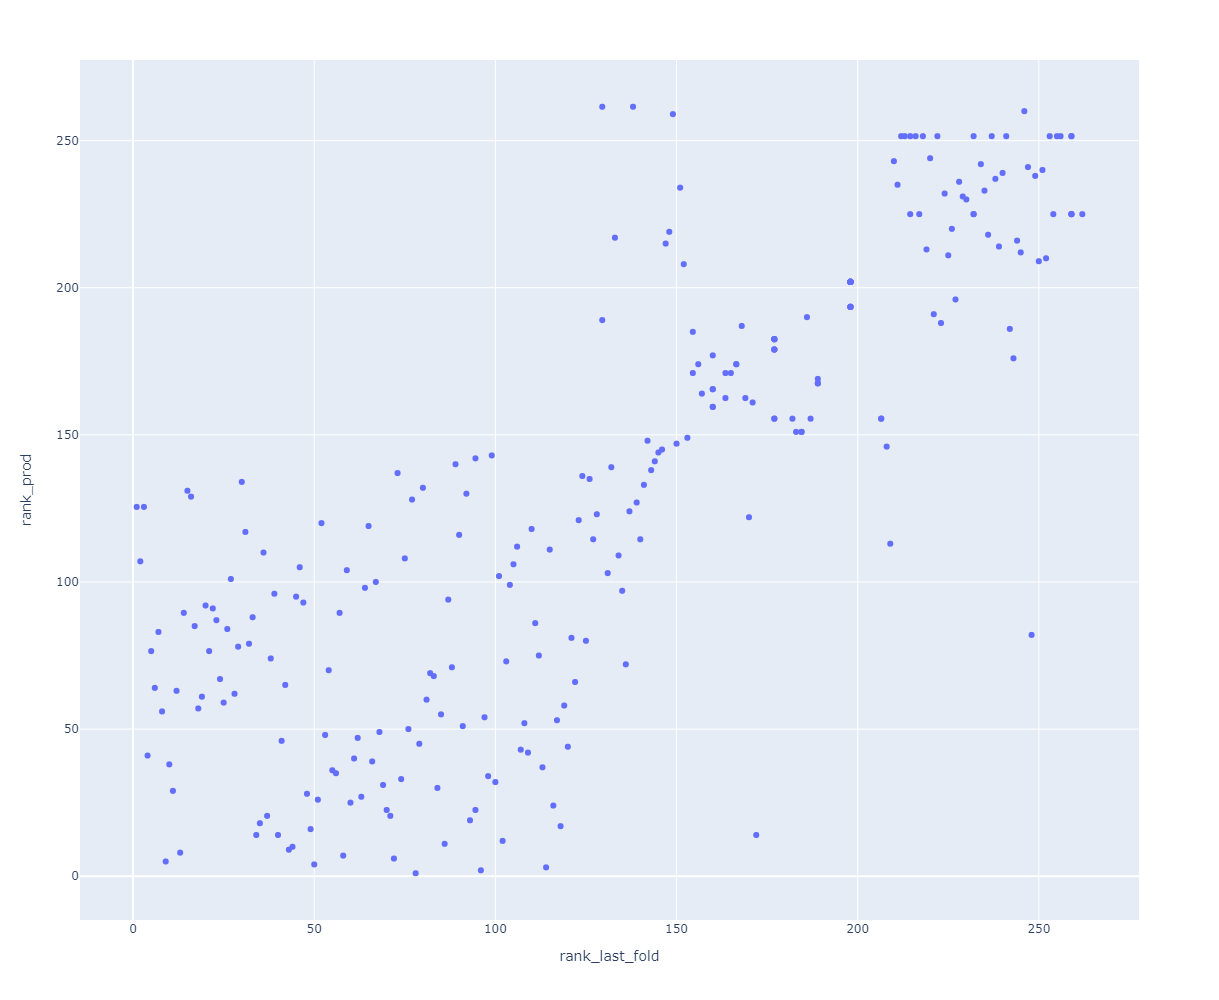

In [179]:
compare_last_prod = pd.merge(results,last_fold_results,on=['model','param_config']).sort_values('rank_last_fold')[['model','param_config','precision_test','precision_prod','rank_last_fold','rank_prod']]
compare_last_prod['diff_last_prod'] =compare_last_prod['rank_last_fold'] - compare_last_prod.rank_prod
fig = compare_last_prod.plot(kind ='scatter',x='rank_last_fold',y='rank_prod',width=1000,height=1000)
#plotly.offline.plot(fig, filename='fig_ranks_last_prod.html')
fig.show()

In [161]:
compare_last_prod

,model,param_config,precision_test,precision_prod,rank_last_fold,rank_prod,diff_last_prod
227,lgb_LGBMClassifier,9,0.627599,0.589888,1.0,125.5,-124.5
243,lgb_LGBMClassifier,29,0.624113,0.604790,2.0,107.0,-105.0
246,lgb_LGBMClassifier,32,0.617284,0.589888,3.0,125.5,-122.5
115,RandomForestClassifier,17,0.615530,0.649485,4.0,41.0,-37.0
228,lgb_LGBMClassifier,10,0.614916,0.631579,5.0,76.5,-71.5
230,lgb_LGBMClassifier,12,0.613309,0.638554,6.0,64.0,-58.0
255,lgb_LGBMClassifier,41,0.612774,0.626506,7.0,83.0,-76.0
140,RandomForestClassifier,42,0.612524,0.642512,8.0,56.0,-48.0
191,XGBClassifier,18,0.612371,0.676692,9.0,5.0,4.0
130,RandomForestClassifier,32,0.612083,0.650718,10.0,38.0,-28.0


In [162]:
#best_model_p_func['model'] = best_model_p_func['model'].str[:-12]


In [163]:
outputs_metrics

,Unnamed: 0,threshold,precision_test,precision_threshold,filename,model,param_config,time,model_config
0,100,0.555556,0.441926,0.366391,"(0, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,0,DecisionTreeClassifier0
1,450,0.485549,0.447646,0.472284,"(1, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,1,DecisionTreeClassifier0
2,800,0.424198,0.397163,0.497674,"(2, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,2,DecisionTreeClassifier0
3,1150,0.516340,0.439252,0.411141,"(3, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,3,DecisionTreeClassifier0
4,1500,0.666667,0.424479,0.464646,"(4, 2, 0)_DecisionTreeClassifier_date_params.csv",DecisionTreeClassifier,0,4,DecisionTreeClassifier0
...,...,...,...,...,...,...,...,...,...
3495,1949,0.635021,0.680672,0.659864,"(5, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,5,lgb_LGBMClassifier9
3496,2299,0.638066,0.728997,0.679104,"(6, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,6,lgb_LGBMClassifier9
3497,2649,0.648194,0.597260,0.774390,"(7, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,7,lgb_LGBMClassifier9
3498,2999,0.657300,0.534274,0.683794,"(8, 3, 9)_lgb_LGBMClassifier_date_params.csv",lgb_LGBMClassifier,9,8,lgb_LGBMClassifier9


In [164]:
final_results = pd.merge(final_results,last_fold_results[['model','param_config','rank_last_fold']],on=['model','param_config'])
final_results

,func,model,param_config,precision_prod,regret_prod,rank_last_fold
0,mean_neg_std_regret_50,lgb_LGBMClassifier,2,0.670807,-0.049400,43.0
1,average,XGBClassifier,32,0.658824,-0.061384,60.0
2,average_neg_std_25,XGBClassifier,32,0.658824,-0.061384,60.0
3,average_neg_std_50,XGBClassifier,32,0.658824,-0.061384,60.0
4,average_neg_std_75,XGBClassifier,32,0.658824,-0.061384,60.0
5,regret_average,XGBClassifier,32,0.658824,-0.061384,60.0
6,mean_neg_std_regret_75,XGBClassifier,32,0.658824,-0.061384,60.0
7,rank_average,lgb_LGBMClassifier,30,0.637931,-0.082276,42.0
8,mean_neg_std_rank_25,lgb_LGBMClassifier,30,0.637931,-0.082276,42.0
9,mean_neg_std_rank_50,lgb_LGBMClassifier,30,0.637931,-0.082276,42.0
